In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
pp.__version__

'7.4.2'

In [3]:
def sigma_decay(energy, rho, life_time, mass):
    c0 = 2.99792458e10 #speed of light in cm / s
    betagamma = np.sqrt((energy + mass)*(energy - mass))/mass
    return 1 / (betagamma * life_time * c0 * rho)

In [4]:
particles = [pp.particle.MuMinusDef(),
            pp.particle.TauMinusDef(),
            pp.particle.EPlusDef(),
            pp.particle.GammaDef()]

In [5]:
medium = pp.medium.Ice()
cuts = pp.EnergyCutSettings(np.inf, 1, False)

In [6]:
param_muon = [
    pp.parametrization.bremsstrahlung.SandrockSoedingreksoRhode(True, pp.particle.MuMinusDef(), medium),
    pp.parametrization.ionization.BetheBlochRossi(cuts),
    pp.parametrization.mupairproduction.KelnerKokoulinPetrukhin(),
    pp.parametrization.pairproduction.SandrockSoedingreksoRhode(True, pp.particle.MuMinusDef(), medium),
    pp.parametrization.photonuclear.AbramowiczLevinLevyMaor97(pp.parametrization.photonuclear.ShadowButkevichMikheyev()),
]
param_muon_stochastic = [
    pp.parametrization.weakinteraction.CooperSarkarMertsch()
]

In [7]:
param_tau = [
    pp.parametrization.bremsstrahlung.SandrockSoedingreksoRhode(True, pp.particle.MuMinusDef(), medium),
    pp.parametrization.ionization.BetheBlochRossi(cuts),
    pp.parametrization.pairproduction.SandrockSoedingreksoRhode(True, pp.particle.MuMinusDef(), medium),
    pp.parametrization.photonuclear.AbramowiczLevinLevyMaor97(pp.parametrization.photonuclear.ShadowButkevichMikheyev()),
]
param_tau_stochastic = [
    pp.parametrization.weakinteraction.CooperSarkarMertsch()
]

In [8]:
param_positron = [
    pp.parametrization.bremsstrahlung.ElectronScreening(True, pp.particle.MuMinusDef(), medium),
    pp.parametrization.ionization.BergerSeltzerMoller(cuts),
    pp.parametrization.pairproduction.ForElectronPositron(True, pp.particle.MuMinusDef(), medium),
    pp.parametrization.photonuclear.AbramowiczLevinLevyMaor97(pp.parametrization.photonuclear.ShadowButkevichMikheyev())
]
param_positron_stochastic = [
    pp.parametrization.annihilation.Heitler(),
    pp.parametrization.weakinteraction.CooperSarkarMertsch()
]

In [9]:
param_photon_stochastic = [
    pp.parametrization.photopair.KochMotz(),
    pp.parametrization.compton.KleinNishina(),
    pp.parametrization.photoproduction.Rhode(),
    pp.parametrization.photomupair.BurkhardtKelnerKokoulin(),
    pp.parametrization.photoeffect.Sauter()
]

In [10]:
interaction_name = {
    pp.particle.Interaction_Type.brems: "Bremsstrahlung",
    pp.particle.Interaction_Type.ioniz: "Ionization",
    pp.particle.Interaction_Type.mupair: r"$\mu^+ \mu^-$ pair production",
    pp.particle.Interaction_Type.epair: r"$e^+ e^-$ pair production",
    pp.particle.Interaction_Type.photonuclear: "Photonuclear",
    pp.particle.Interaction_Type.weakint: "Weak interaction",
    pp.particle.Interaction_Type.annihilation: "Annihilation",
    pp.particle.Interaction_Type.photomupair: r"$\mu^+ \mu^-$ pair production",
    pp.particle.Interaction_Type.photopair: r"$e^+ e^-$ pair production",
    pp.particle.Interaction_Type.compton: "Compton scattering",
    pp.particle.Interaction_Type.photoproduction: "Photoproduction",
    pp.particle.Interaction_Type.photoeffect: "Photoeffect"
}

In [11]:
colors = {
    pp.particle.Interaction_Type.brems: "tab:green",
    pp.particle.Interaction_Type.ioniz: "tab:blue",
    pp.particle.Interaction_Type.mupair: "tab:purple",
    pp.particle.Interaction_Type.epair: "tab:orange",
    pp.particle.Interaction_Type.photonuclear: "tab:red",
    pp.particle.Interaction_Type.weakint: "tab:brown",
    pp.particle.Interaction_Type.annihilation: "tab:olive",
    pp.particle.Interaction_Type.photomupair: "tab:purple",
    pp.particle.Interaction_Type.photopair: "tab:orange",
    pp.particle.Interaction_Type.compton: "tab:cyan",
    pp.particle.Interaction_Type.photoproduction: "tab:red",
    pp.particle.Interaction_Type.photoeffect: "tab:green"
}

In [12]:
def is_stochastic(interaction_type):
    if(interaction_type in (pp.particle.Interaction_Type.weakint, 
                            pp.particle.Interaction_Type.annihilation,
                            pp.particle.Interaction_Type.compton,
                            pp.particle.Interaction_Type.photopair,
                            pp.particle.Interaction_Type.photomupair,
                            pp.particle.Interaction_Type.photoproduction,
                            pp.particle.Interaction_Type.photoeffect)):
        return True
    return False

In [13]:
cross_muon = []
for param in param_muon:
    cross_muon.append(pp.crosssection.make_crosssection(param, pp.particle.MuMinusDef(), medium, cuts, False))
for param in param_muon_stochastic:
    cross_muon.append(pp.crosssection.make_crosssection(param, pp.particle.MuMinusDef(), medium, None, False))

In [14]:
cross_tau = []
for param in param_tau:
    cross_tau.append(pp.crosssection.make_crosssection(param, pp.particle.TauMinusDef(), medium, cuts, False))
for param in param_tau_stochastic:
    cross_tau.append(pp.crosssection.make_crosssection(param, pp.particle.TauMinusDef(), medium, None, False))

In [15]:
cross_positron = []
for param in param_positron:
    cross_positron.append(pp.crosssection.make_crosssection(param, pp.particle.EPlusDef(), medium, cuts, False))
for param in param_positron_stochastic:
    cross_positron.append(pp.crosssection.make_crosssection(param, pp.particle.EPlusDef(), medium, None, False))

In [16]:
cross_photon = []
for param in param_photon_stochastic:
    cross_photon.append(pp.crosssection.make_crosssection(param, pp.particle.GammaDef(), medium, None, False))

In [17]:
def create_plot(particle, cross_list, particle_symbol, file_name, E_min = 1e4, E_max = 1e12):
    energies = np.geomspace(E_min, E_max, 500)
    for c in cross_list:
        if (is_stochastic(c.type) == False):
            plt.plot(energies, c.calculate_dEdx(energies), label=interaction_name[c.type], color=colors[c.type])
        else:
            plt.plot(energies, energies*c.calculate_dNdx(energies), label=interaction_name[c.type], color=colors[c.type])
    if(not np.isinf(particle.lifetime)):
        plt.plot(energies, energies * sigma_decay(energies, medium.mass_density, particle.lifetime, particle.mass), label='Decay', color="tab:pink")    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'Particle energy / MeV', fontsize=18)
    plt.ylabel(r'$\left\langle\frac{\mathrm{d}E}{\mathrm{d}X}\right\rangle \,\left/\, \left( \rm{MeV} \cdot \rm{cm^2} / \rm{g} \right) \right. $', fontsize=20)
    plt.legend(fontsize=12, loc=2)
    plt.grid(ls = ':', lw = 1, zorder = 0)
    plt.xlim(E_min, E_max)
    t = plt.text(0.8, 0.25, particle_symbol, transform=plt.gca().transAxes, fontsize=50, alpha=0.8)
    t.set_bbox(dict(facecolor='grey', alpha=0.3, edgecolor='none'))
    plt.savefig(file_name, bbox_inches='tight', dpi=300)

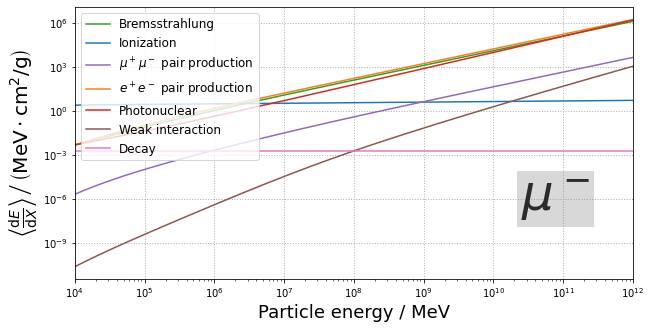

In [18]:
create_plot(pp.particle.MuMinusDef(), cross_muon, r"$\mu^-$","muon_dEdx.png")

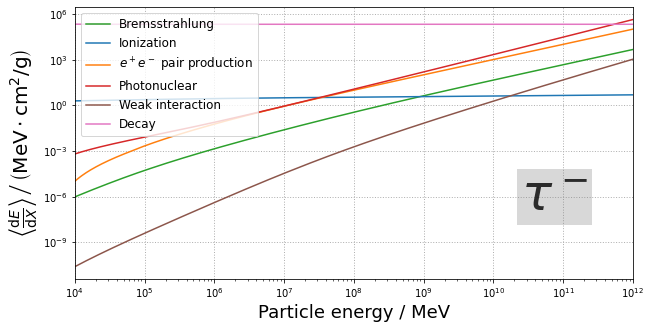

In [19]:
create_plot(pp.particle.TauMinusDef(), cross_tau, r"$\tau^-$", "tau_dEdx.png")

In [ ]:
create_plot(pp.particle.EPlusDef(), cross_positron, r"$e^+$", "positron_dEdx.png")

In [ ]:
create_plot(pp.particle.GammaDef(), cross_photon, r"$\gamma$", "photon_dEdx.png", E_min = 1e-2, E_max = 1e6)